In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
from sklearn.preprocessing import QuantileTransformer, StandardScaler
from sklearn.decomposition import FastICA, PCA

In [9]:
df = (
  pd
  .read_csv("output/feature_counts_deseq2_normed.tsv", sep="\t")
  .set_index("id")
)

df = df - df.median(axis=0)

In [10]:
#stddf = QuantileTransformer(output_distribution="normal").fit_transform(df)
stddf = StandardScaler().fit_transform(df) #QuantileTransformer(output_distribution="normal").fit_transform(df)


pca = PCA()
pca.fit(stddf)

PCA()

In [11]:
pca_ncomponents = np.argmax(np.cumsum(pca.explained_variance_ratio_) > 0.99) + 1

In [12]:
pca_ncomponents

27

In [13]:
S = list()
A = list()

In [16]:
stddf = df #StandardScaler().fit_transform(df) #QuantileTransformer(output_distribution="normal").fit_transform(df)

fica = FastICA(n_components=30, max_iter=10000, tol=1e-4)
results = fica.fit_transform(stddf)

S.append(pd.DataFrame(results, index=df.index))
A.append(pd.DataFrame(fica.mixing_, index=df.columns))

<Axes: >

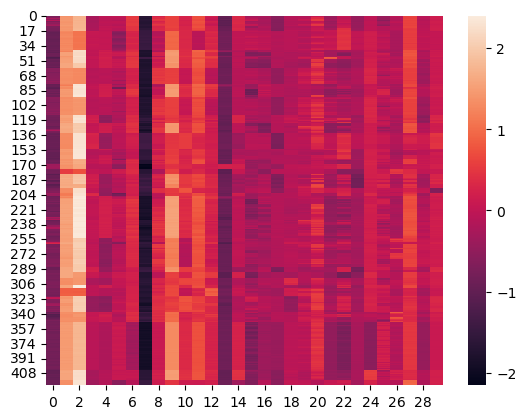

In [17]:
sns.heatmap(fica.mixing_)

In [18]:
from sklearn.cluster import DBSCAN

In [19]:
dbs = DBSCAN().fit_predict(results)

In [20]:
np.unique(dbs)

array([-1])

<Axes: >

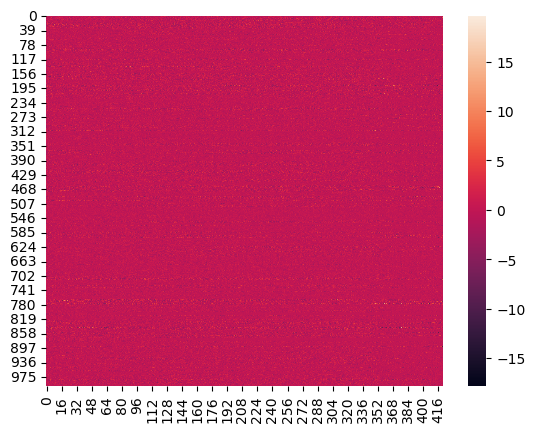

In [117]:
sns.heatmap(StandardScaler().fit_transform(pca.fit_transform(stddf)[1:1000, ]))

In [118]:
#results = StandardScaler().fit_transform(pca.fit_transform(stddf)[:, :50])

In [119]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage

In [120]:
dists = pdist(results[:2000,], metric="correlation")
sqdists = squareform(dists)

In [121]:
tree = linkage(dists)

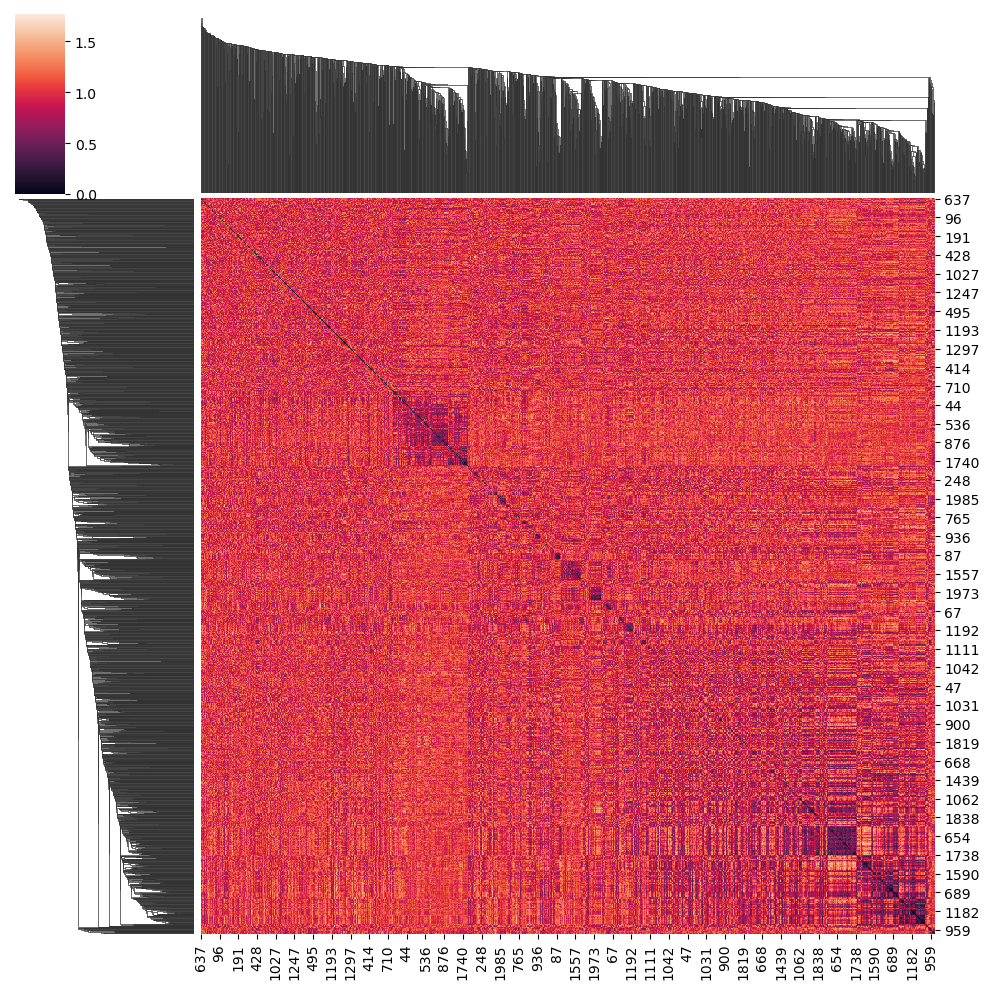

In [122]:
sns.clustermap(sqdists, row_linkage=tree, col_linkage=tree)